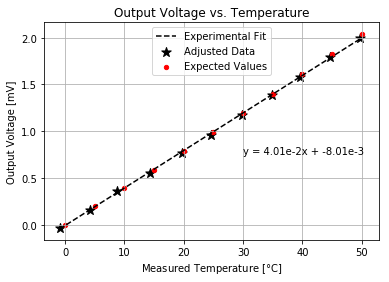

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 30)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

dat = pd.DataFrame(data = pd.read_csv('~/Documents/ME345W/Labs/Lab7/Lab7raw.csv',header = 0,names = ["NT","ET","OV","CJT"]))
#ds = pd.DataFrame(data = pd.read_csv('~/Documents/ME345W/Labs/Lab7/TDDD.csv',sep = '\ ,' ,header = None))
#ds.columns = ['Fun']
degC = r"$\degree$C"                                      
labels = ['Output Voltage [mV]','Measured Temperature ['+degC+']','Output Voltage vs. Temperature','Adjusted Data','Expected Values','Experimental Fit']
zero_adj = .790+(.83-.79)*(20.6-20.0)/1 # in mV
dat['OV_adj'] = dat['OV'] + zero_adj
dat["exp_Vo"] = [0.0,0.195,0.391,0.589,0.790,0.992,1.196,1.403,1.612,1.823,2.036];
temp = dat["ET"]
Vout = dat["OV"]
CJtemps = dat["CJT"]
#OVadj = dat['OV_adj']

def interpolate(data,xlow,xhigh,ylow,yhigh,exp):
    
    X1 = xlow
    X2 = xhigh
    Y1 = ylow
    Y2 = yhigh
    
    return [(X1 + (X2 - X1)*(i - Y1)/(Y2 - Y1)) for i in exp]
exp = dat["ET"]
ylow = 0
yhigh = 50.0
xlow = 20.6
xhigh = 21.1
dat['CJ_ref_adj'] =  interpolate(dat,xlow,xhigh,ylow,yhigh,exp)
xlow = .790
xhigh = .870
ylow = 20
yhigh = 22
dat['V_int_adj'] = interpolate(dat,xlow,xhigh,ylow,yhigh,dat['CJ_ref_adj'])
dat['OV_int_adj'] = dat['OV']+dat['V_int_adj']
#dat['V_adj_factor'] = 
OVadj = dat['OV_int_adj']
TL0 = -1
VL0 =  -.039 
VH0 = 0
TH0 = 0
T0 = TL0 + (TH0-TL0)*(OVadj[0]-VL0)/(VH0-VL0)
TL1 = 4
VL1 = .156  
VH1 = .195
TH1 = 5
T1 = TL1 + (TH1-TL1)*(OVadj[1]-VL1)/(VH1-VL1)
TL2 = 8
VL2 = .352 
VH2 = .391
TH2 = 10
T2 = TL2 + (TH2-TL2)*(OVadj[2]-VL2)/(VH2-VL2)
TL3 = 14
VL3 = .549
VH3 = .589
TH3 = 15
T3 = TL3 + (TH3-TL3)*(OVadj[3]-VL3)/(VH3-VL3)
TL4 = 19
VL4 = .749  
VH4 = .790
TH4 = 20
T4 = TL4 + (TH4-TL4)*(OVadj[4]-VL4)/(VH4-VL4)
TL5 = 24
VL5 = .951 
VH5 = .992
TH5 = 25
T5 = TL5 + (TH5-TL5)*(OVadj[5]-VL5)/(VH5-VL5)
TL6 = 29
VL6 = 1.155  
VH6 = 1.196
TH6 = 30
T6 = TL6+ (TH6-TL6)*(OVadj[6]-VL6)/(VH6-VL6)
TL7 = 34
VL7 = 1.362
VH7 = 1.403
TH7 = 35
T7 = TL7 + (TH7-TL7)*(OVadj[7]-VL7)/(VH7-VL7)
TL8 = 39
VL8 = 1.570  
VH8 = 1.612
TH8 = 40
T8 = TL8 + (TH8-TL8)*(OVadj[8]-VL8)/(VH8-VL8)
TL9 = 44
VL9 = 1.780  
VH9 = 1.823
TH9 = 45
T9 = TL9 + (TH9-TL9)*(OVadj[9]-VL9)/(VH9-VL9)
TL10 = 49
VL10 =   1.993
VH10 = 2.036
TH10 = 50
T10 = TL10 + (TH10-TL10)*(OVadj[10]-VL10)/(VH10-VL10)

dat['adj_Temp'] = [T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10]
def color_plot(data,vert_lab, hor_lab,exp_vert,exp_hor,labels, cmap=None, alpha=None):
    vert = data[vert_lab].values
    hor = data[hor_lab].values
    hor2 = data[exp_hor].values
    vert2 = data[exp_vert].values
    fig, ax = plt.subplots()
    ax.grid()
    ax.set_ylabel(labels[0])
    ax.set_xlabel(labels[1])
    plt.title(labels[2])
    #colors = ((vert2 - vert)/vert2)*((hor2-hor)/hor2)
    ax.scatter(hor, vert,marker = '*', c = 'black',cmap = plt.get_cmap(cmap), alpha=alpha,label = labels[3],s = 100)
    ax.scatter(hor2, vert2,marker = '.', color = 'red', alpha=alpha,label = labels[4],s = 75)
    
    pp = PdfPages('Lab7_Figure1-1.pdf')
    pp.savefig(fig)
    pp.close()
    p1 = np.polyfit(hor,vert,1)
    fit1 = np.polyval(p1,hor)
    P = np.array(round(p1[0],4))
    P1 = np.array(round(p1[1],5))
    #print(P)
    m = np.format_float_scientific(P, exp_digits=1)
    b = np.format_float_scientific(P1, exp_digits=1)
    ax.plot(hor,fit1,'--',color = 'black',label = labels[5])
    ax.text(30,.75,'y = '+str(m)+'x + '+str(b))
    ax.legend(loc = 'upper center')
    #ax.annotate(txt, (z[i], y[i]))
    #heatmap = ax.pcolor(data_q, cmap=plt.get_cmap(cmap)) # heatmap 
    #plt.colorbar(heatmap)
    
    #fig.tight_layout()
    
    return fig, ax, vert, hor


fig, ax, vert, hor = color_plot(dat,"OV_adj","adj_Temp","exp_Vo","ET",labels, cmap = "seismic", alpha = 1.0)

pp = PdfPages('Lab7_Figure1-2.pdf')
pp.savefig(fig)
pp.close()                                 

In [3]:
dat

,NT,ET,OV,CJT,OV_adj,exp_Vo,CJ_ref_adj,V_int_adj,OV_int_adj,adj_Temp
0,0,0.0,-0.851,20.6,-0.037,0.000,20.60,0.814,-0.037,-0.948718
1,5,5.0,-0.653,NaN,0.161,0.195,20.65,0.816,0.163,4.179487
2,10,10.0,-0.453,NaN,0.361,0.391,20.70,0.818,0.365,8.666667
3,15,15.0,-0.258,NaN,0.556,0.589,20.75,0.820,0.562,14.325000
4,20,20.0,-0.046,NaN,0.768,0.790,20.80,0.822,0.776,19.658537
5,25,25.0,0.149,NaN,0.963,0.992,20.85,0.824,0.973,24.536585
6,30,30.0,0.361,NaN,1.175,1.196,20.90,0.826,1.187,29.780488
7,35,35.0,0.569,NaN,1.383,1.403,20.95,0.828,1.397,34.853659
8,40,40.0,0.767,NaN,1.581,1.612,21.00,0.830,1.597,39.642857
9,45,45.0,0.980,NaN,1.794,1.823,21.05,0.832,1.812,44.744186
